## Visualize the outputs from `params/param_default-example.ini`

Note the paramter set `param_default-example.ini` was designed as an example to test that everything is installed correctly and give you a feel for `forward-dream`. It only runs for twenty years -- too short to reach genetic equilibrium. Otherwise, the parameter values are the same as those in Table 1. of the manuscript.

In [3]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.response import *
from lib.preferences import *

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style("white")

plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True

In [5]:
# Font sizes
plt.rc('font', size=12)         # controls default text sizes
plt.rc('axes', titlesize=14)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

## Preferences

In [7]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)",
})

In [8]:
savefig = True

## Load Simulation

In [31]:
sim_path = "../results/default/sim_default-example_0001/"

In [32]:
# Load full data frame
epoch_df = pd.read_csv(os.path.join(sim_path, "epoch_df.csv"))
epoch_df.index = epoch_df.name
og = pd.read_csv(os.path.join(sim_path, "og.csv"))
op = pd.read_csv(os.path.join(sim_path, "op.csv"))

# Merge on time
ot = pd.merge(left=op, right=og, on="t0")

In [33]:
epoch_df

,name,t0,t1,param,val,x_h,x_v
name,,,,,,,
init,init,0,3650,NaN,NaN,0.653846,0.075556
ReduceVectors,ReduceVectors,3650,7300,['nv'],[1000.0],0.333333,0.040000


In [34]:
time_limits = (0, epoch_df.t1[-1])

In [35]:
op.shape, og.shape, ot.shape

((243, 9), (243, 24), (243, 32))

## Plot

### Prevalence

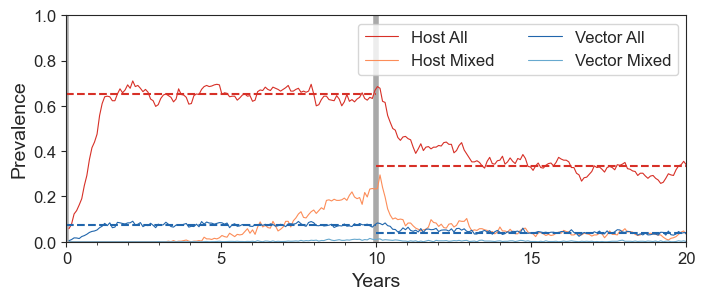

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

# Plot
prevalence_trajectory_plot(ot, epoch_df, ax,
                           col_dt=prevalence_col_dt,
                           norm_t0=None,
                           indicate_epochs=None,
                           indicate_equilibriums=None,
                           time_limits=time_limits,
                           years_per_major_tick=5)

# Indicator lines
for epoch, row in epoch_df.iterrows():
    # Details
    xs = [row["t0"], row["t1"]]
    x_hs = [row["x_h"]] * 2
    x_vs = [row["x_v"]] * 2
    # Horizontal
    ax.plot(xs, x_hs, ls="dashed", color=prevalence_col_dt["HX"])
    ax.plot(xs, x_vs, ls="dashed", color=prevalence_col_dt["VX"])
    # Vertical
    ax.axvline(row["t0"], ls="solid", linewidth=4, color="darkgrey", zorder=-1)

# Labels & Legend
ax.set_xlabel("Years")
ax.set_ylabel("Prevalence")
ax.legend(loc="upper right", ncol=2)

if savefig:
    fig.savefig("../figs/sec0_default-prevalence.png", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec0_default-prevalence.pdf", bbox_inches="tight", pad_inches=0.5)

### Genetics

In [68]:
metrics = ["mean_k", "frac_mixed_samples", 
           "pi",  "tajd",  
           "n_singletons", "n_segregating",
           "l_ibd", "f_ibd"]
n_metrics = len(metrics)
metric_cols = dict(zip(metrics, sns.color_palette("plasma", n_metrics)))

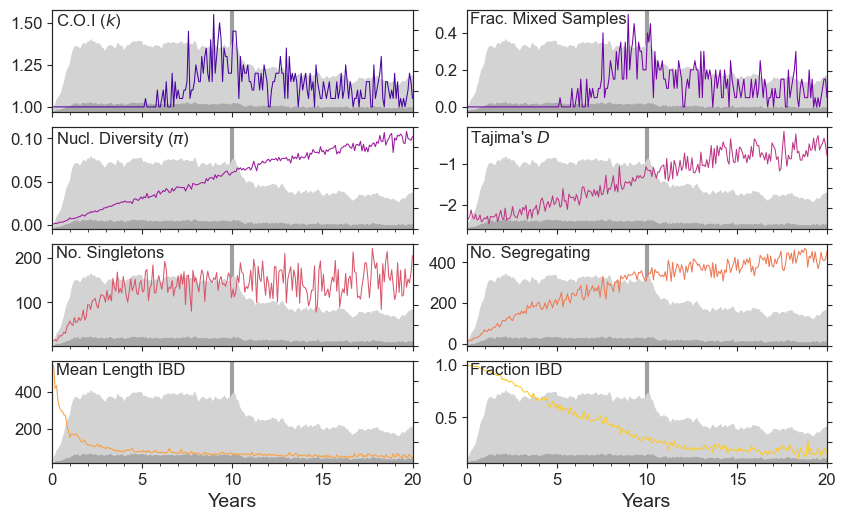

In [73]:
fig, axes = plt.subplots(int(n_metrics/2), 2, figsize=(10, 6), sharex=True)
fig.subplots_adjust(hspace=0.15, wspace=0.15)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Raw
    genetic_trajectory_plot(metric, ot, epoch_df,
                            metric_cols[metric], ax,
                            norm_t0=None,
                            indicate_epochs=[("ReduceVectors", "t0")],
                            time_limits=time_limits,
                            years_per_major_tick=5)

    # Annotate genetic metric
    #ax.set_ylabel(genetic_names[metric], fontsize=12)
    #ax.set_title(genetic_names[metric], fontsize=12, loc="left")
    ax.annotate(genetic_names[metric], xy=(0.01, 0.98), xycoords="axes fraction", 
                ha="left", va="top")
                #bbox=dict(boxstyle="square", fc="white", ec="black", lw=1, alpha=0.5))
        
# Outside labels
axes[-1, 0].set_xlabel("Years")
axes[-1, 1].set_xlabel("Years")
  
if savefig:
    fig.savefig("../figs/sec0_default-genetics.png", bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec0_default-genetics.pdf", bbox_inches="tight", pad_inches=0.5)